In [1]:
import numpy as np 
from tkinter import *
from PIL import Image
from PIL import ImageTk as itk
import time

res = 500   # Animation resolution
tk = Tk()  
tk.geometry( str(int(res*1.1)) + 'x'  +  str(int(res*1.3)) )
tk.configure(background='white')

canvas = Canvas(tk, bd=2)            # Generate animation window 
tk.attributes('-topmost', 0)
canvas.place(x=res/20, y=res/20, height= res, width= res)
ccolor = ['#0008FF', '#DB0000', '#12F200']

temperature = Scale(tk, from_=0.01, to=10, orient=HORIZONTAL, label='Temperature', font=("Helvetica", 8),resolution=0.01)
temperature.place(relx=.12, rely=.85, relheight= 0.12, relwidth= 0.33)     
temperature.set(1)            # Parameter slider for growth rate                                                       

mag = Scale(tk, from_=-1, to=1, orient=HORIZONTAL, label='Magnetic field', font=("Helvetica", 8) ,resolution=0.01)
mag.place(relx=.57, rely=.85, relheight= 0.12, relwidth= 0.33)
mag.set(0)          # Parameter slider for lightning rate


# Decide on the parameters
l = 100
J = 1       # Neighbor interaction [k_BT/unit spin] 
H = 0       # External magnetic field [k_BT/unit spin]

# Initialize the lattice
S = np.sign(np.random.rand(l,l) - 0.5)
ferromagnet_image = np.zeros((l,l,3))  
t = 0
while True: 
    T = temperature.get()
    H = mag.get()
    i = np.random.randint(0,l,int(l*l/10))
    j = np.random.randint(0,l,int(l*l/10))
    E = (-J * ( S[i-1,j] + S[(i+1)%l,j] + S[i,j-1] + S[i,(j+1)%l] ) - H)/T
    S[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2  
    t += 1
    
    #if t%1000 == 0:
    ferromagnet_image[:,:,:] = 0                               
    ferromagnet_image[:,:,0] =   (S == -1)*255                 
    ferromagnet_image[:,:,1] =   (S == -1)*255                  
    ferromagnet_image[:,:,2] =   (S == 1)*255 

    img = itk.PhotoImage(Image.fromarray(np.uint8(ferromagnet_image),'RGB').resize((res,res)))
    canvas.create_image(0,0, anchor=NW, image=img) 
    tk.title('time'+ str(t) + '   Magnetization:' + str(np.mean(S)))
    tk.update()

Tk.mainloop(canvas)    

TclError: invalid command name ".!scale"

In [94]:
# Decide on the parameters
l = 500
J = 1       # Neighbor interaction [k_BT/unit spin] 
H = 0       # External magnetic field [k_BT/unit spin]


# Initialize the lattice
T = 0.25
m = []
ls = []
for T in (np.arange(10)/10+1.8):
    
    S = np.sign(np.random.rand(l,l) - 0.5)
    
    for t in range(10000): 
        i = np.random.randint(0,l,int(l*l/10))
        j = np.random.randint(0,l,int(l*l/10))
        E = (-J * ( S[i-1,j] + S[(i+1)%l,j] + S[i,j-1] + S[i,(j+1)%l] ) - H)/T
        S[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2  
        
    ls.append(np.mean(np.linalg.norm(np.gradient(S),axis=0)))
        
    m.append(np.mean(S))
    print(T)


1.8
1.9000000000000001
2.0
2.1
2.2
2.3
2.4
2.5
2.6
2.7


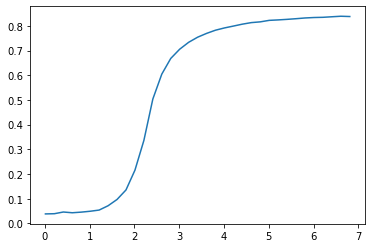

In [79]:
plt.plot(np.arange(35)/5+0.01,ls)

2.3


0.4023207186654288

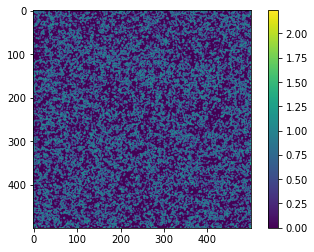

In [91]:
# Decide on the parameters
l = 500
J = 1       # Neighbor interaction [k_BT/unit spin] 
H = 0       # External magnetic field [k_BT/unit spin]


# Initialize the lattice
T = 0.25
m = []
ls = []
T = 2.3
    
S = np.sign(np.random.rand(l,l) - 0.5)

for t in range(30000): 
    i = np.random.randint(0,l,int(l*l/10))
    j = np.random.randint(0,l,int(l*l/10))
    E = (-J * ( S[i-1,j] + S[(i+1)%l,j] + S[i,j-1] + S[i,(j+1)%l] ) - H)/T
    S[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2  
    m.append(np.mean(S))

ls.append(np.mean(np.linalg.norm(np.gradient(S),axis=0)))

    
print(T)



plt.imshow(np.linalg.norm(np.gradient(S),axis=0))
plt.colorbar()
np.mean(np.linalg.norm(np.gradient(S),axis=0))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

# Decide on the parameters
l = 200
J = 1       # Neighbor interaction [k_BT/unit spin] 
H = 0       # External magnetic field [k_BT/unit spin]


plt.figure(figsize=(20,20))
mm = []
row = 0

for T in [1, 2 ,2.5 , 5]:

    # Initialize the lattice
    m = []
    ls = []


    S = np.sign(np.random.rand(l,l) - 0.5)

    number_plot = 1

    for t in range(100001): 

        i = np.random.randint(0,l,int(l*l/10))
        j = np.random.randint(0,l,int(l*l/10))
        E = (-J * ( S[i-1,j] + S[(i+1)%l,j] + S[i,j-1] + S[i,(j+1)%l] ) - H)/T
        S[i,j] =  (( np.random.rand(int(l*l/10)) < np.exp(-E)/(np.exp(-E)+np.exp(E)) ) -0.5) * 2  
        m.append(np.mean(S))
        ls.append(np.mean(np.linalg.norm(np.gradient(S),axis=0)))

        if (t==0 or t==100 or t==10000 or t==100000):
            plt.subplot(4,4,number_plot + row*4)
            if T==1:
                plt.title('t= ' + str(t))
            plt.xticks([])
            plt.yticks([])
            plt.imshow(S)
            number_plot += 1
            print('quarter')
    
    mm.append(m) 
    row += 1







quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter


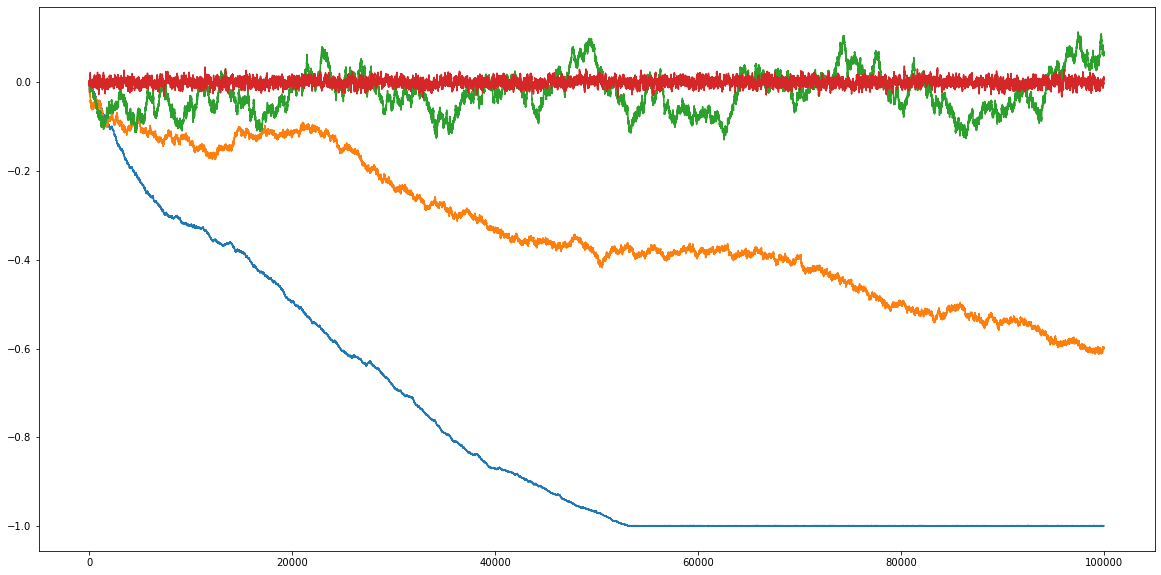

In [23]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.plot(mm[i])


In [40]:
np.sum(S)

3803.0